# <center> College Student Placement Analysis <center>

# About Dataset

## Dataset Description

This dataset simulates the academic and professional profiles of 10,000 college students, focusing on factors that influence placement outcomes. It includes features like IQ, academic performance, CGPA, internships, communication skills, and more.

The dataset is ideal for:
- Predictive modeling of placement outcomes
- Educational exercises in classification
- Feature importance analysis
- End-to-end machine learning projects

## Columns Description

| Column Name | Description |
| :------- | :------- |
| College_ID | Unique ID of the college (e.g., CLG0001 to CLG0100) |
| IQ	Student’s | IQ score (normally distributed around 100) |
| Prev_Sem_Result | GPA from the previous semester (range: 5.0 to 10.0) |
| CGPA | Cumulative Grade Point Average (range: ~5.0 to 10.0) |
| Academic_Performance | Annual academic rating (scale: 1 to 10) |
| Internship_Experience | Whether the student has completed any internship (Yes/No) |
| Extra_Curricular_Score | Involvement in extracurriculars (score from 0 to 10) |
| Communication_Skills | Soft skill rating (scale: 1 to 10) |
| Projects_Completed | Number of academic/technical projects completed (0 to 5) |
| Placement | Final placement result (Yes = Placed, No = Not Placed) |

## Target Variable
Placement: This is the binary classification target (Yes/No) that is predicted based on the other features.

# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv(r"college_student_placement_dataset.csv")

In [3]:
df.head() # Display the first few rows of the dataset

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
print(df.info()) # Show basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None


In [5]:
df.describe(include='all')

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000
unique,100,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,CLG0062,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,No
freq,133,NaN,NaN,NaN,NaN,6036,NaN,NaN,NaN,8341
mean,NaN,99.471800,7.535673,7.532379,5.546400,NaN,4.970900,5.561800,2.513400,NaN
std,NaN,15.053101,1.447519,1.470141,2.873477,NaN,3.160103,2.900866,1.715959,NaN
min,NaN,41.000000,5.000000,4.540000,1.000000,NaN,0.000000,1.000000,0.000000,NaN
25%,NaN,89.000000,6.290000,6.290000,3.000000,NaN,2.000000,3.000000,1.000000,NaN
50%,NaN,99.000000,7.560000,7.550000,6.000000,NaN,5.000000,6.000000,3.000000,NaN
75%,NaN,110.000000,8.790000,8.770000,8.000000,NaN,8.000000,8.000000,4.000000,NaN


# Data Cleaning

In [6]:
df.isnull().sum() # Check for missing values

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [7]:
df.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [8]:
# Encode categorical variables
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

In [9]:
# Drop College_ID (not useful for prediction)
df.drop(columns=['College_ID'], inplace=True)

In [10]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  int64  
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [12]:
# Save cleaned data
df.to_csv(r'cleaned_dataset.csv', index=False)

In [13]:
# Load the cleaned dataset
df = pd.read_csv(r'cleaned_dataset.csv')

# Exploratory Data Analysis (EDA)

<h2> Univariant Analysis <h2>

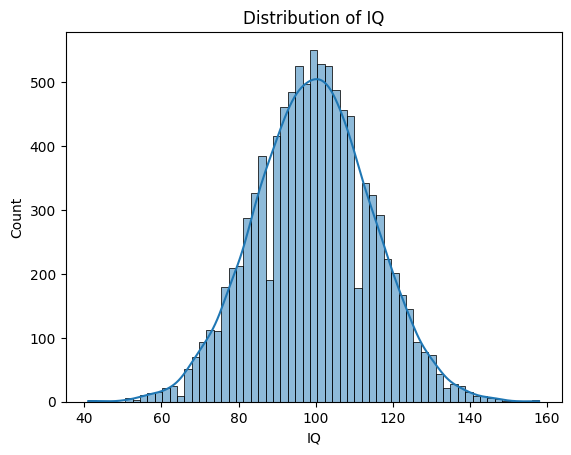

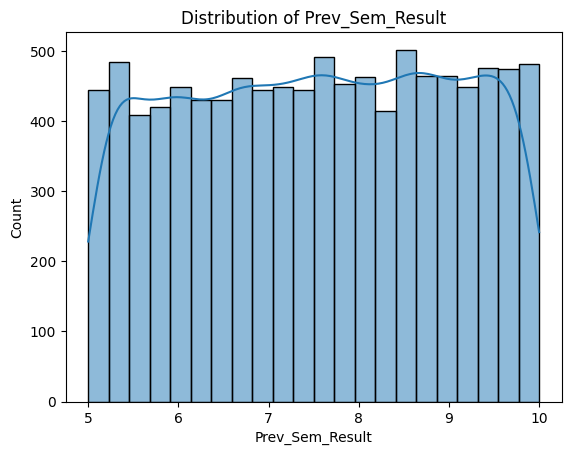

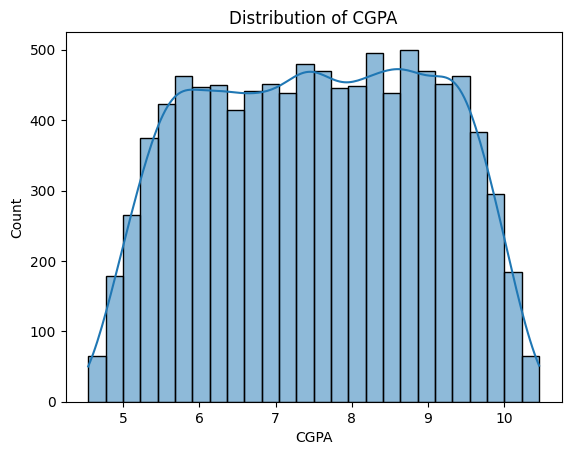

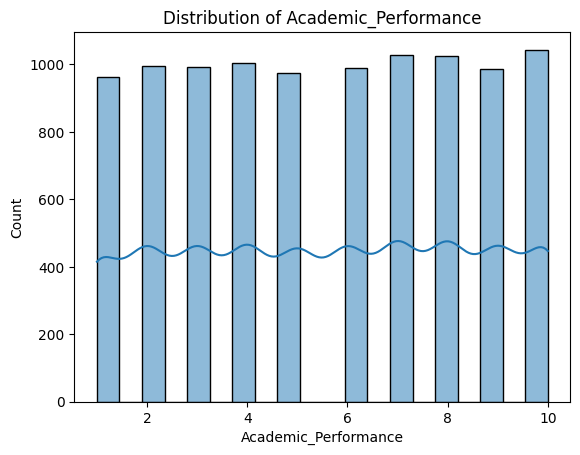

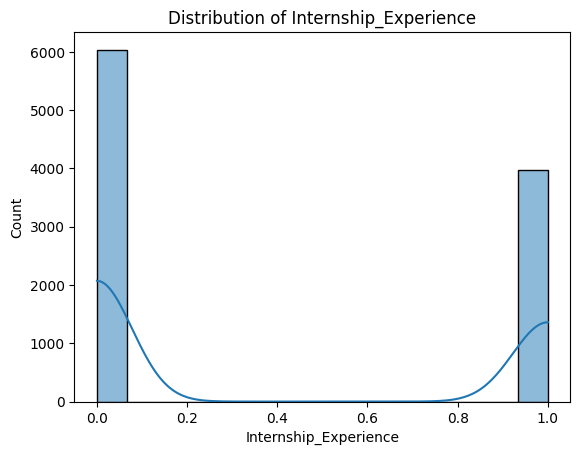

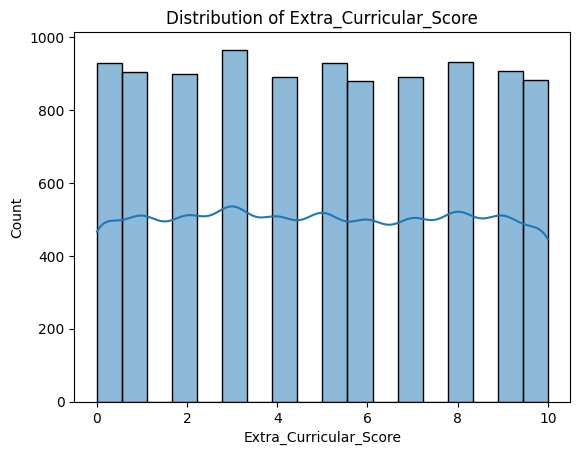

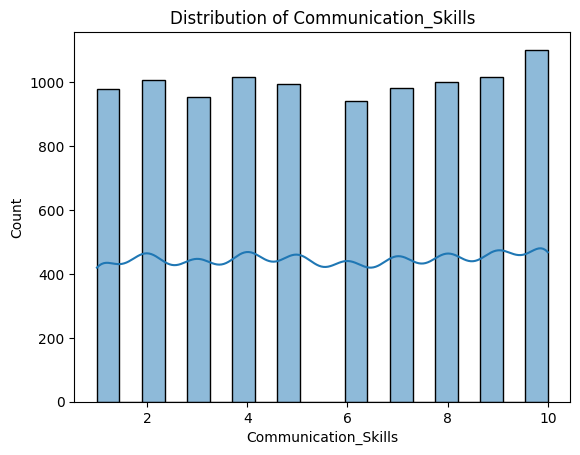

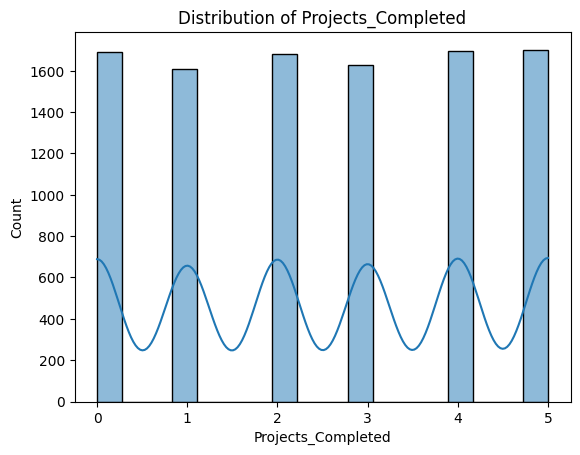

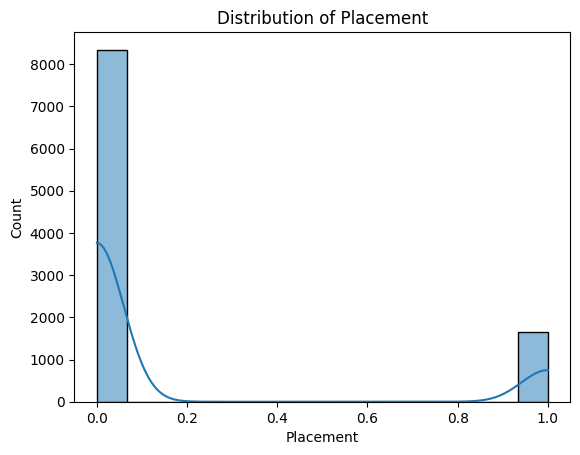

In [24]:
# Numerical Feature Distribution
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<h3> Univariant Analysis Summary <h3>

Univariate analysis focused on each variable independently:

- IQ and CGPA are normally distributed with mild right skew.
- Academic Performance, Communication Skills, and Extra-Curricular Score show balanced spread.
- Placement Outcome (target) is imbalanced:
    - Around 83% students are not placed, and only 17% are placed.
- No missing values or duplicates were found.
- Internship Experience is binary (Yes/No) and was encoded for modeling.

<h2> Multivariant Analysis <h2>

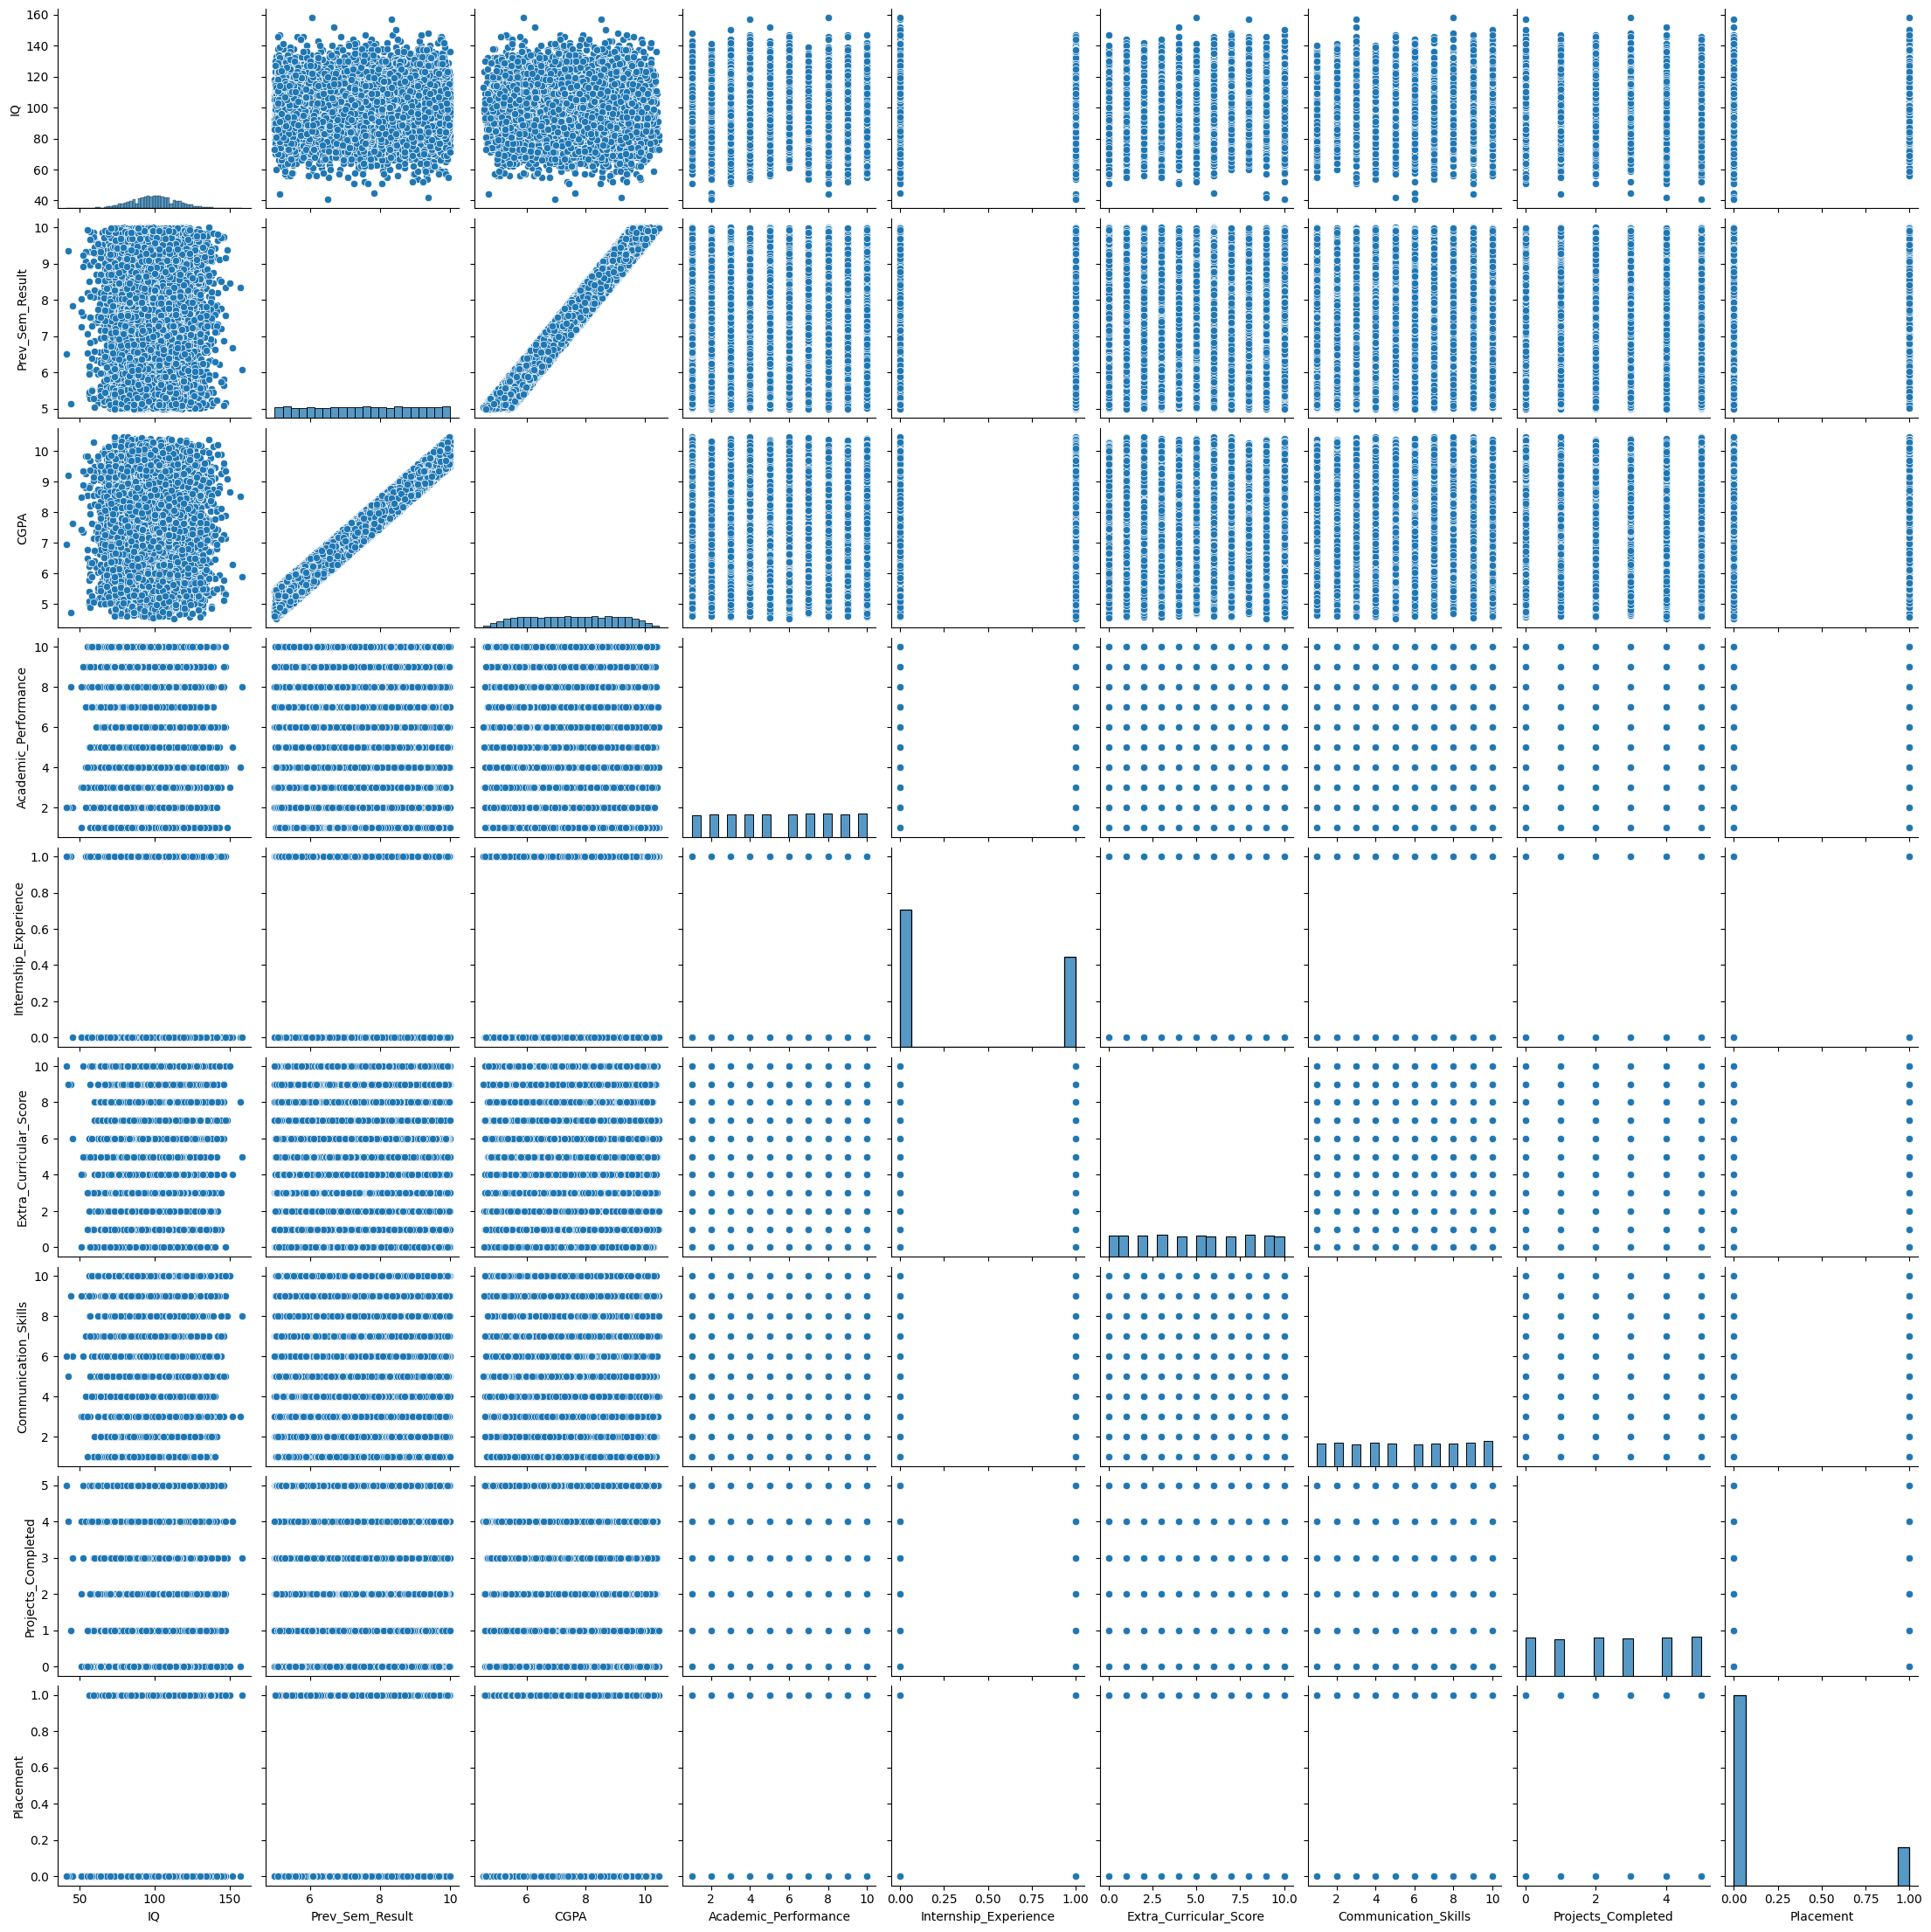

In [ ]:
# Pairplot
sns.pairplot(df[numerical_cols])
plt.show()

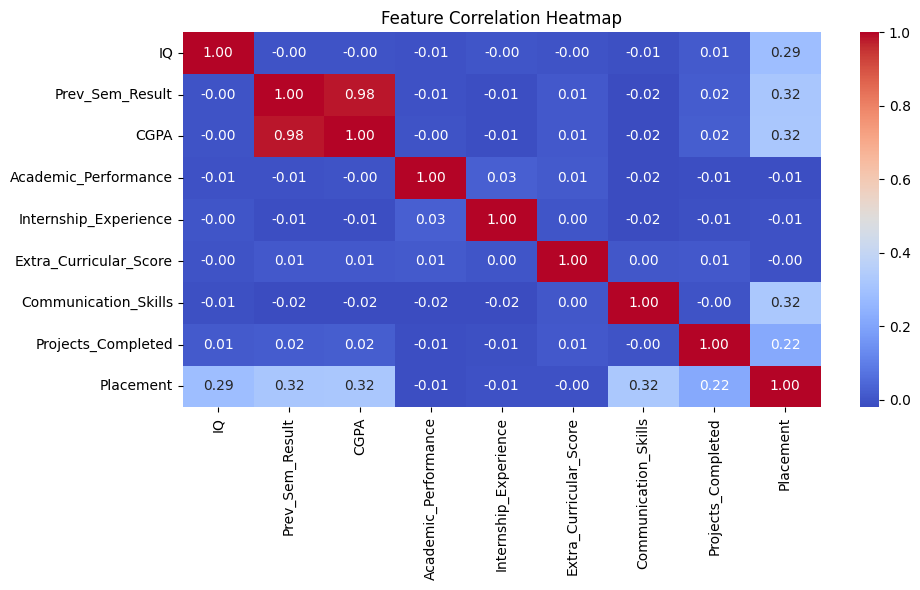

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

<h3> Multivariant Analysis Summary <h3>

Multivariate analysis explored interactions between variables and their effect on placement:

- CGPA vs Placement:
    - Students with higher CGPA were more likely to be placed.
    - Clear distinction in median CGPA between placed vs not placed students.
- IQ vs Placement:
    - Students with higher IQ tended to have higher placement probability.
- Internship Experience:
    - Strongly correlated with placement.
    - Students with internships had significantly higher placement rates.
- Feature Correlation Heatmap:
    - Positive correlation among IQ, CGPA, Academic Performance, and Placement.
    - All features show varying but meaningful contributions to placement.

## 1. Target Variable Distribution

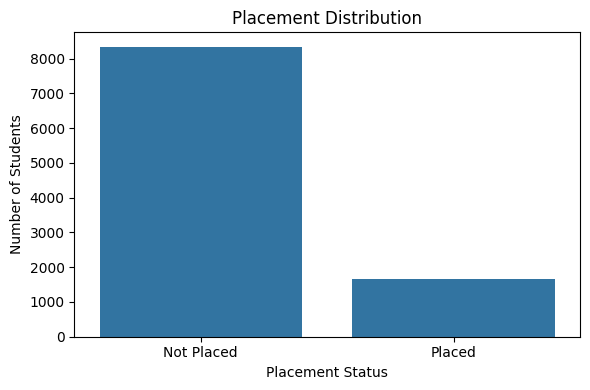

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Placement')
plt.title('Placement Distribution')
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

- A majority of students are not placed (about 83%).

## 2. CGPA vs Placement

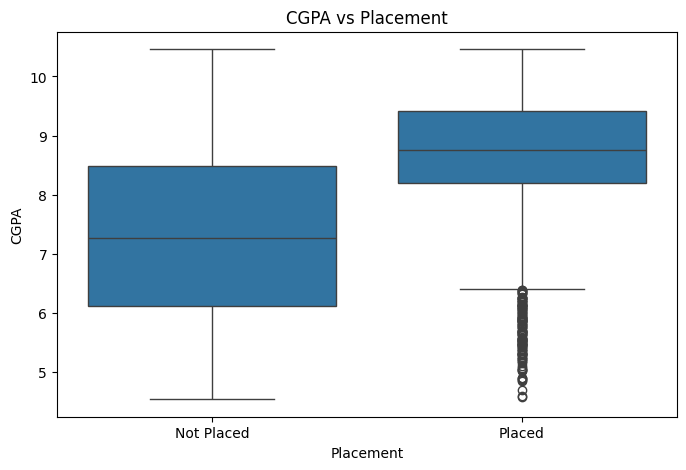

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Placement', y='CGPA')
plt.title('CGPA vs Placement')
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()

- Students with higher CGPA are more likely to be placed.

## 3. IQ vs Placement

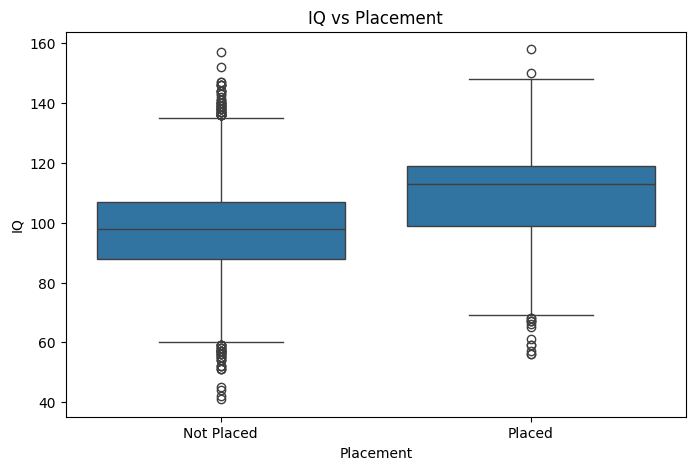

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Placement', y='IQ')
plt.title('IQ vs Placement')
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()

- Similar trend: higher IQ may correspond with higher placement chances.

## 4. Internship Experience vs Placement

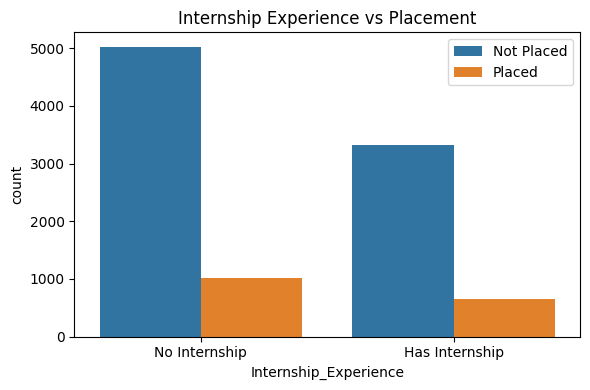

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Internship_Experience', hue='Placement')
plt.title('Internship Experience vs Placement')
plt.xticks([0, 1], ['No Internship', 'Has Internship'])
plt.legend(['Not Placed', 'Placed'])
plt.tight_layout()
plt.show()

- Students with internship experience (Yes) are more frequently placed.

# EDA Conclusions:

1. Higher CGPA and IQ scores positively correlate with placement.
2. Internship Experience greatly improves placement chances.
3. Academic Performance, Communication Skills, and Projects also play a role.
4. The target variable 'Placement' is imbalanced (majority not placed).

# Suggested Model:

Based on EDA, Random Forest Classifier on 'Plcement' will be the best suited. Random Forest Classifier is suitable due to:

- Ability to handle both numeric and categorical features.
- Handles imbalanced classes well.
- Provides feature importance.